In [ ]:
import sklearn.datasets as datasets
iris = datasets.load_iris()

print("iris data size is {}".format(iris.data.shape))
print("iris target size is {}".format(iris.target.shape))
print("iris data has {} features, the feature names are {}".format(iris.data.shape[1], iris.feature_names))
print("iris data has {} samples, the target label names {}".format(iris.data.shape[1], iris.target_names))

iris data size is (150, 4)
iris target size is (150,)
iris data has 4 features, the feature names are ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
iris data has 4 samples, the target label names ['setosa' 'versicolor' 'virginica']


In [ ]:
iris = datasets.load_iris()
print("iris dataset is {}".format(iris.DESCR))
print("iris data size is {}".format(iris.data.shape))
print("iris target size is {}".format(iris.target.shape))
print("iris data has {} features, the feature names are {}".format(
    iris.data.shape[1], iris.feature_names))
print("iris data has {} samples, the target label names {}".format(
    iris.data.shape[1], iris.target_names))

iris dataset is .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= =

In [ ]:
X,y = datasets.make_classification(n_features=2,
                                   n_redundant=0, n_informative=1,n_clusters_per_class=1)
print("The data X shape is {}".format(X.shape))
print("The data y shape is {}".format(y.shape))

The data X shape is (100, 2)
The data y shape is (100,)


In [ ]:
import sklearn.feature_selection as fs
import numpy as np

X = np.array([[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1,
                                                                      1]])
var = fs.VarianceThreshold(threshold=0.2)
var.fit(X)
X_trans = var.transform(X)
print("The original data")
print(X)
print("The processed data by variance threshold")
print(X_trans)

The original data
[[0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 1]
 [0 1 0]
 [0 1 1]]
The processed data by variance threshold
[[0 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]]


Iris data size is (150, 4)
Iris target size is (150,)
The first five samples of Iris [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
The first five samples of transform data [[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]]


TypeError: ignored

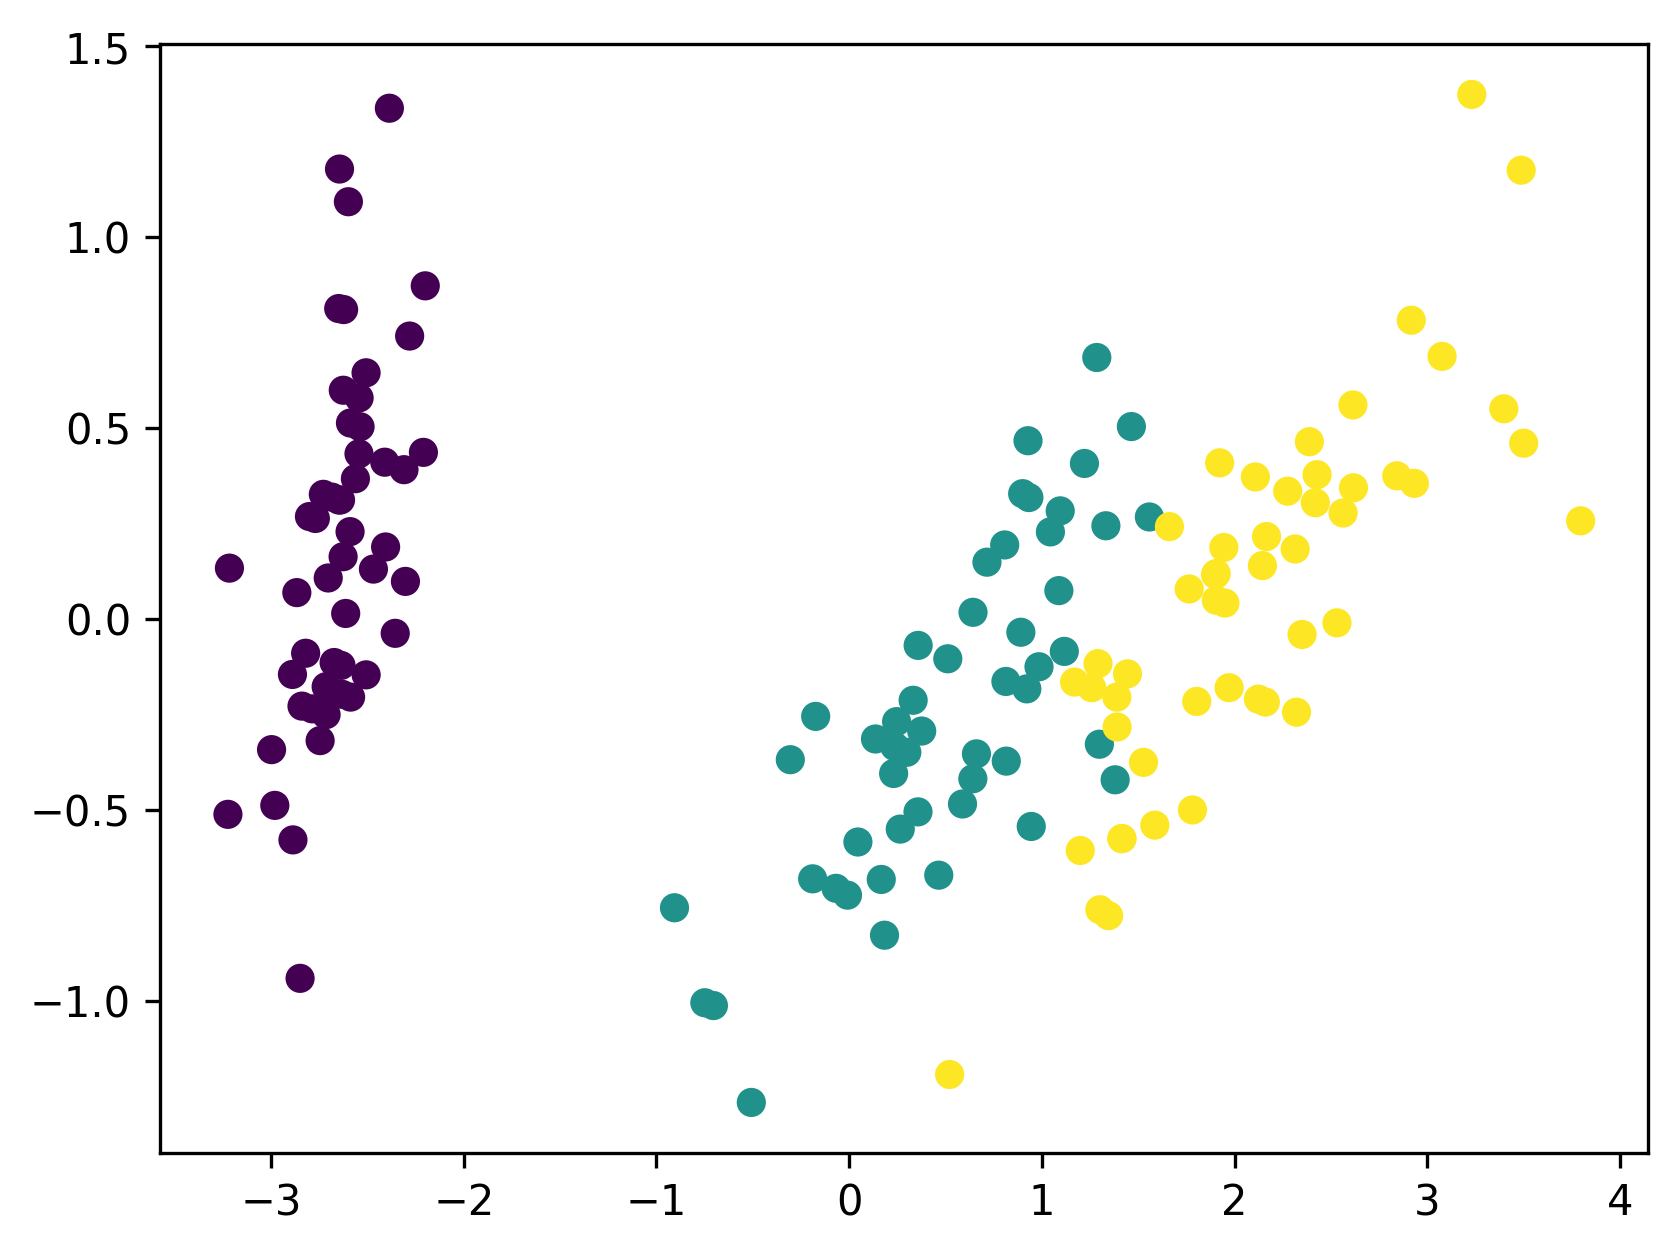

In [ ]:
import sklearn.datasets as datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X, y = datasets.load_iris(return_X_y=True)
print("Iris data size is {}".format(X.shape))
print("Iris target size is {}".format(y.shape))
print("The first five samples of Iris {}".format(X[:5]))

pca = PCA(n_components=2)

pca.fit(X)

X_tran = pca.transform(X)

print("The first five samples of transform data {}".format(X_tran[:5]))

fig, axe = plt.subplots(dpi=300)
axe.scatter(X_tran[:, 0], X_tran[:, 1], c=y)
fig.savefig()
plt.close(fig)


In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X_tran,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

print("The first five samples {}".format(train_x[:5]))
print("The first five targets {}".format(train_y[:5]))

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver="liblinear")
lr.fit(train_x, train_y)

import sklearn.metrics as metrics

#metrics.plot_confusion_matrix(lr, test_x, test_y)

pred_y = lr.predict(test_x)
acc = metrics.accuracy_score(test_y, pred_y)
print("The accuracy on PCA+LR is {}".format(acc))

The first five samples [[-3.21593942  0.13346807]
 [-2.38603903  1.33806233]
 [ 0.92786078  0.46717949]
 [-2.61275523  0.01472994]
 [-2.99740655 -0.34192606]]
The first five targets [0 0 1 0 0]
The accuracy on PCA+LR is 0.9333333333333333


In [ ]:
import sklearn.datasets as datasets

X, y = datasets.make_classification(2000,
                                    n_features=40,
                                    n_informative=10)

print("The shape of the X is {}".format(X.shape))
print("The shape of the y is {}".format(y.shape))

from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

fus = FeatureUnion([('pca', PCA(n_components=10)),
                    ('bestK', SelectKBest(k=10))])

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

steps = [("feaunion", fus),
         ("another_pca", PCA(n_components=15)),
         ("lr",LinearRegression())]

pipeline = Pipeline(steps)
pipeline.fit(X,y)

param_grid = dict(feaunion__pca__n_components=[8, 9, 10, 11],
                  feaunion__bestK__k=[8, 9, 10, 11])
from sklearn.model_selection import GridSearchCV

cv = GridSearchCV(pipeline, param_grid=param_grid)
cv.fit(X, y)
print("Best parameters set found on development set:")
print(cv.best_params_)

The shape of the X is (2000, 40)
The shape of the y is (2000,)
Best parameters set found on development set:
{'feaunion__bestK__k': 8, 'feaunion__pca__n_components': 11}


In [ ]:
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

X, y = datasets.make_classification(800, n_features=10, n_informative=6)
print("The shape of the X is {}".format(X.shape))
print("The shape of the y is {}".format(y.shape))
print("The first five samples of X {}".format(X[:5]))

train_x, test_x, train_y, test_y = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

gb = GradientBoostingClassifier(random_state=10)

param_grid = [{
    "n_estimators": [1, 2, 4, 16, 32, 64],
    "learning_rate": [0.05, 0.1, 0.2, 0.4],
    "min_samples_leaf": [1, 2, 4, 8, 16],
    "max_depth": [1, 2, 3]
}]

cv = GridSearchCV(gb, param_grid=param_grid, scoring="f1", n_jobs=4)
cv.fit(train_x, train_y)

print("Best parameters set found on development set:")
print(cv.best_params_)
print("Grid scores on development set:")
means = cv.cv_results_['mean_test_score']
stds = cv.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, cv.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

The shape of the X is (800, 10)
The shape of the y is (800,)
The first five samples of X [[ 0.427431    0.89384114  0.05470586 -1.66181095 -0.23029366  0.65780375
  -0.98023473 -1.24959819  1.99808399 -1.58251444]
 [ 0.65958487  0.08431546  0.080423    1.54099495  2.2097032   1.78584106
  -3.51492542 -0.34051632  2.72565546 -1.00081952]
 [-0.51233077 -3.06499918 -0.68150341  2.01994378  0.13436902  1.34733147
  -0.20923224  0.48315815  1.18746387 -0.58695109]
 [ 0.39682821  0.96955985  1.04493653 -0.4155856   1.03582625  2.12812359
  -3.65227936 -0.98867867  3.53030484 -1.30214922]
 [ 2.74121509  2.68852989 -1.42353804 -2.62046527  0.32615766 -2.74696019
   1.89691117 -0.0760464  -1.47381893 -0.48938206]]
Best parameters set found on development set:
{'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 8, 'n_estimators': 64}
Grid scores on development set:
0.784 (+/-0.078) for {'learning_rate': 0.05, 'max_depth': 1, 'min_samples_leaf': 1, 'n_estimators': 1}
0.784 (+/-0.076) for {

In [ ]:
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

house = datasets.load_boston()

print("The data shape of house is {}".format(house.data.shape))
print("The number of feature in this data set is {}".format(
    house.data.shape[1]))

train_x, test_x, train_y, test_y = train_test_split(house.data,
                                                    house.target,
                                                    test_size=0.2,
                                                    random_state=42)

print("The first five samples {}".format(train_x[:5]))
print("The first five targets {}".format(train_y[:5]))
print("The number of samples in train set is {}".format(train_x.shape[0]))
print("The number of samples in test set is {}".format(test_x.shape[0]))

lr = LinearRegression()
lr.fit(train_x, train_y)

pred_y = lr.predict(test_x)
print("The first five prediction {}".format(pred_y[:5]))
print("The real first five labels {}".format(test_y[:5]))

mse = metrics.mean_squared_error(test_y, pred_y)
print("Mean Squared Error {}".format(mse))

ImportError: ignored

Coefficients: [0.88363636]
Bias term: 6.418181818181818


FileNotFoundError: ignored

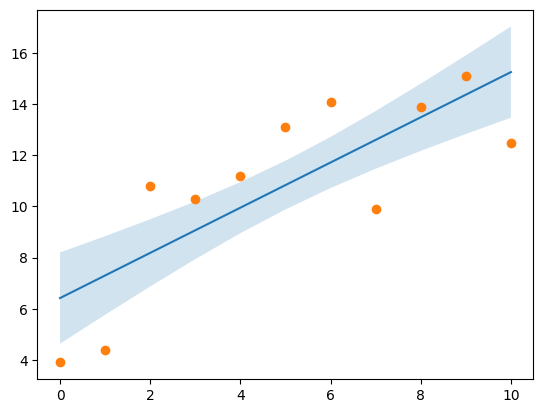

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 11)
y = [3.9, 4.4, 10.8, 10.3, 11.2, 13.1, 14.1, 9.9, 13.9, 15.1, 12.5]

lr2 = LinearRegression()
lr2.fit(x.reshape(-1, 1), y)
print('Coefficients: {}'.format(lr2.coef_))
print('Bias term: {}'.format(lr2.intercept_))

y_est = x * lr2.coef_ + lr2.intercept_
y_err = x.std() * np.sqrt(1 / len(x) +
                          (x - x.mean())**2 / np.sum((x - x.mean())**2))
fig, ax = plt.subplots()
ax.plot(x, y_est, '-')
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
ax.plot(x, y, 'o')
fig.savefig("output/img.png", dpi = 300)
plt.close(fig)

FileNotFoundError: ignored

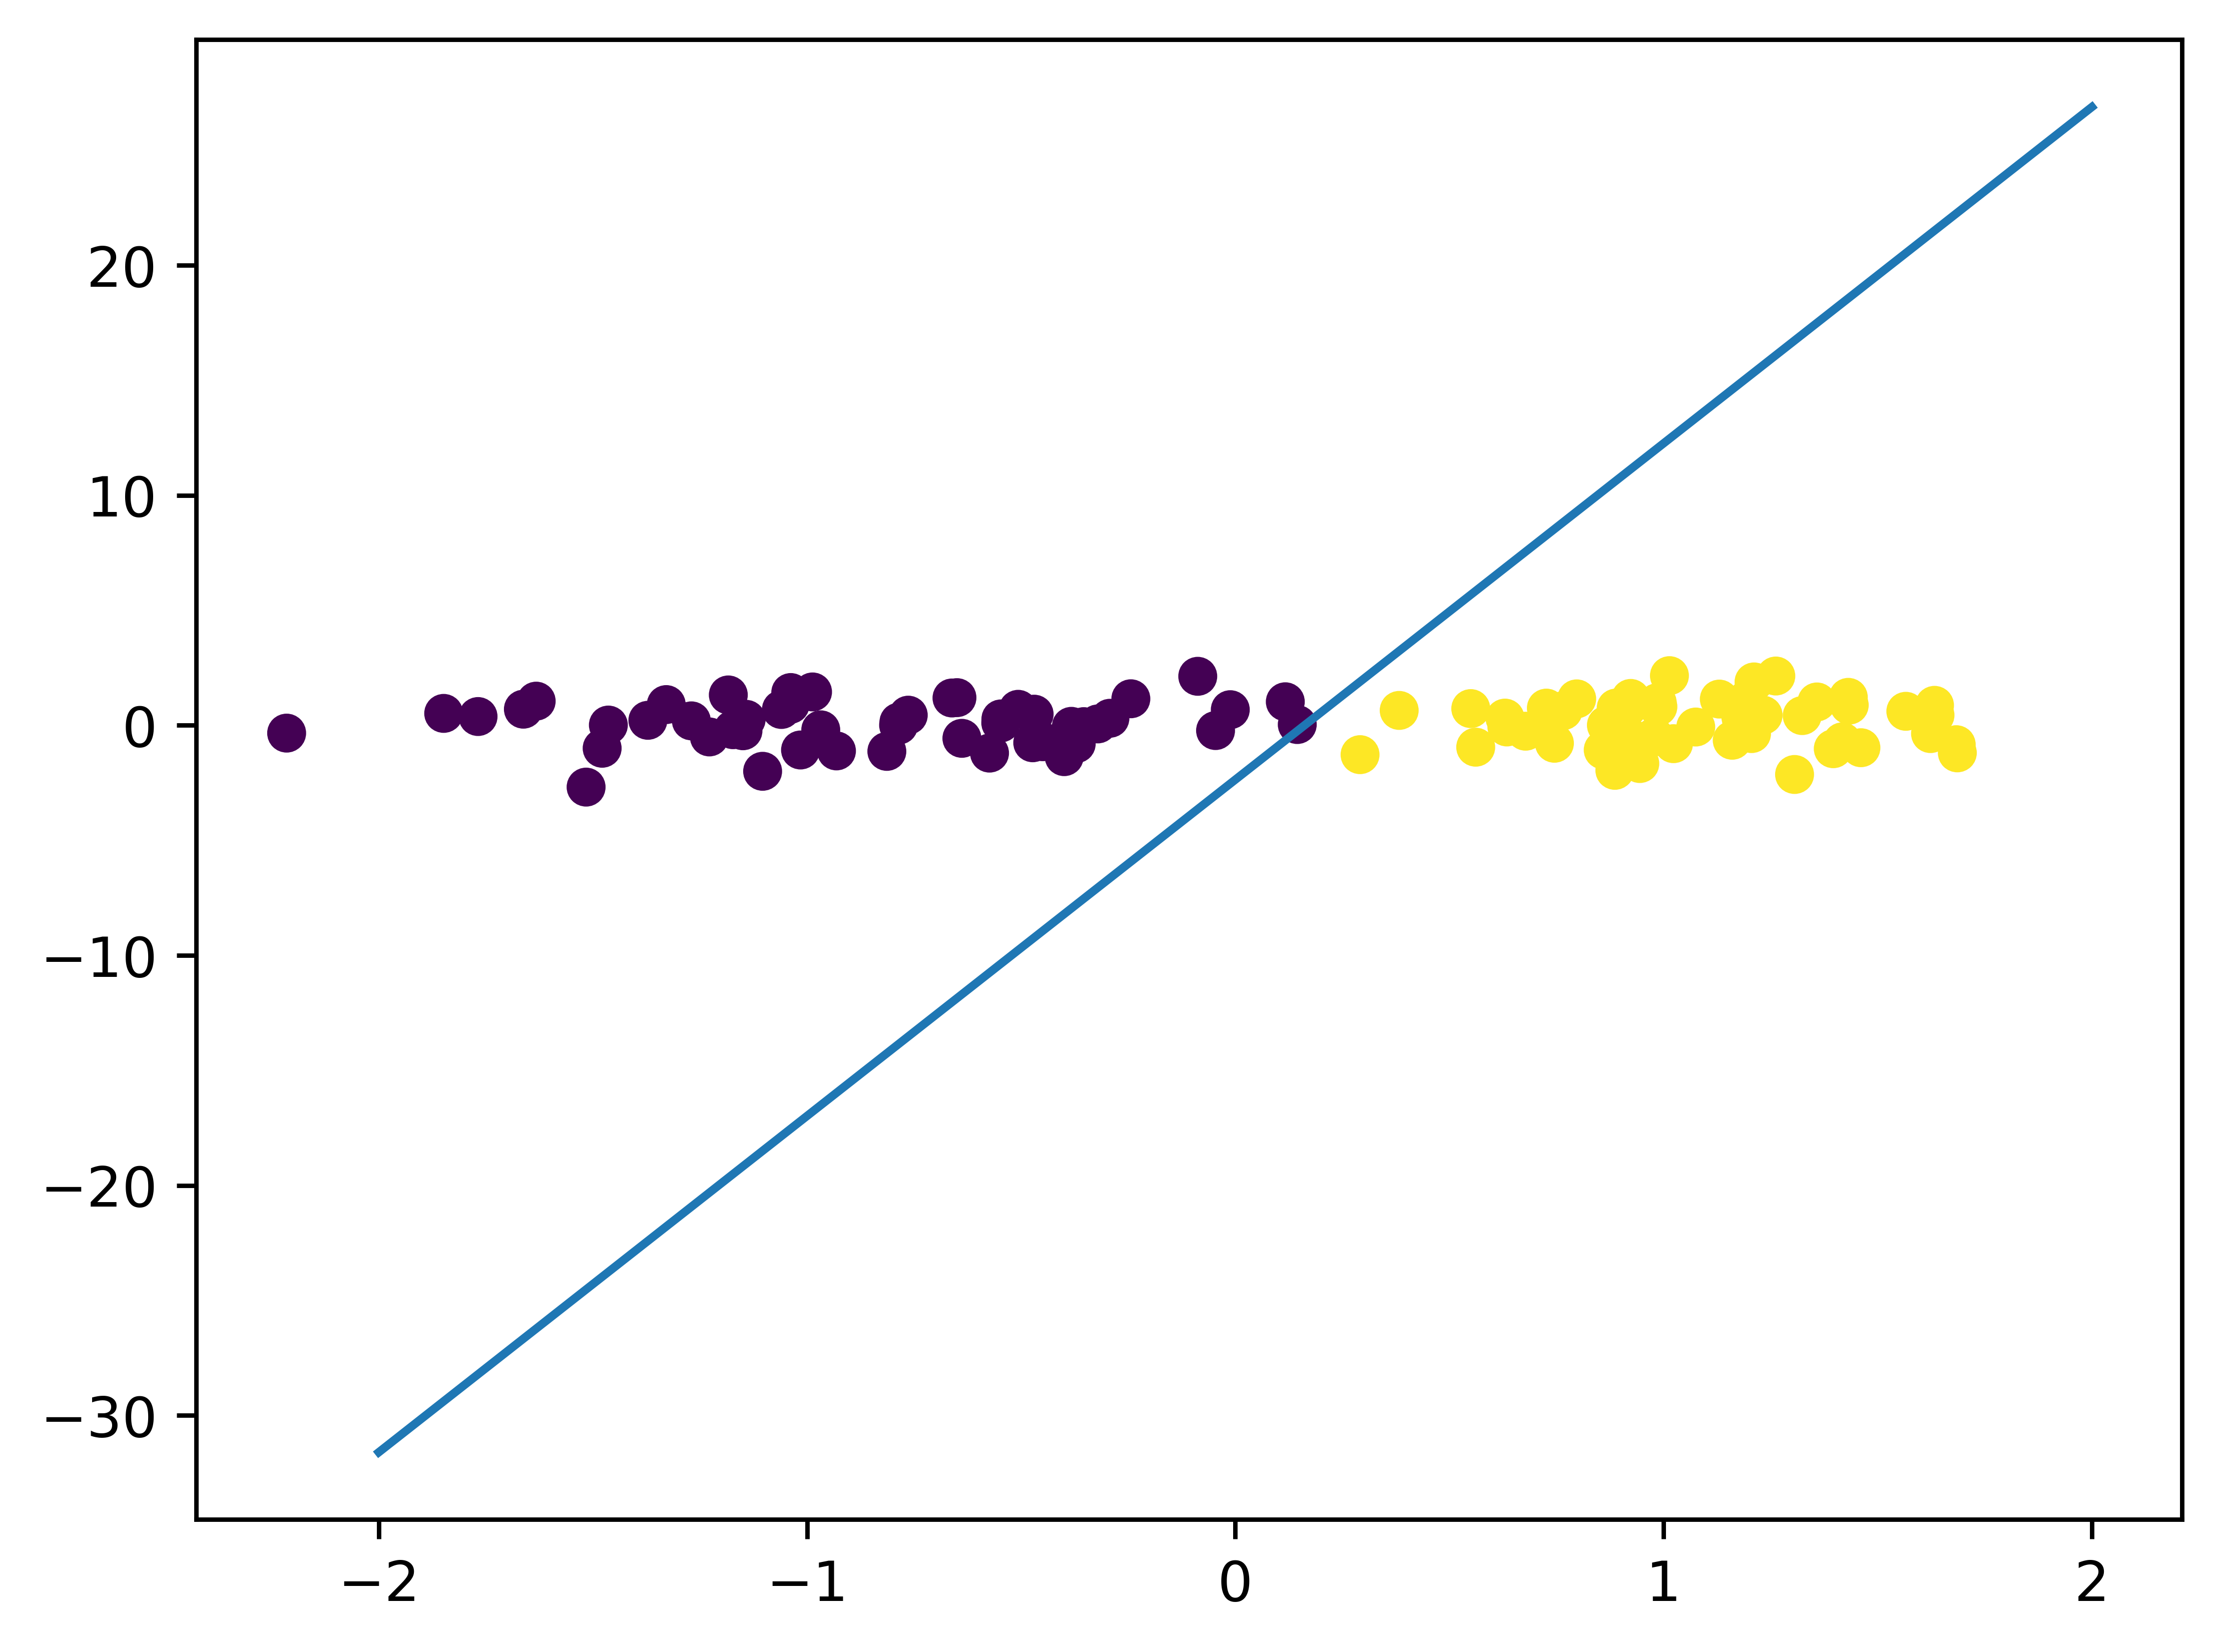

In [ ]:
'''
import matplotlib
import sklearn.datasets as datasets

cancer = datasets.load_breast_cancer()
print("The data shape of breast cancer is {}".format(cancer.data.shape))
print("There are {} classes in this dataset".format(cancer.target_names.size))

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(cancer.data, cancer.target,
                                                    test_size=0.2, random_state=42)

print("The first five samples {}".format(train_x[:5]))
print("The first five targets {}".format(train_y[:5]))
'''

import sklearn.datasets as datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import numpy as np

X, y = datasets.make_classification(n_features=2,
                                    n_redundant=0,
                                    n_informative=1,
                                    n_clusters_per_class=1)
lr2 = LogisticRegression(solver="liblinear")
lr2.fit(X, y)

fig, axe = plt.subplots(dpi=800)
axe.scatter(X[:, 0], X[:, 1], c=y, marker='o')
line_bias = lr2.intercept_
line_w = lr2.coef_.T
points_x = np.linspace(-2, 2, 100)
points_y = [(line_w[0] * x + line_bias) / (-1 * line_w[1]) for x in points_x]
axe.plot(points_x, points_y)
fig.savefig("output/img.png", dpi = 300)
plt.close(fig)




num of n: 1
num of n: 2
num of n: 3
num of n: 4
num of n: 5
num of n: 6
num of n: 7
num of n: 8
num of n: 9
num of n: 10
num of n: 11
num of n: 12
num of n: 13
num of n: 14
num of n: 15
num of n: 16
num of n: 17
num of n: 18
num of n: 19
num of n: 20
num of n: 21
num of n: 22
num of n: 23
num of n: 24
num of n: 25
num of n: 26
num of n: 27
num of n: 28
num of n: 29
num of n: 30
num of n: 31
num of n: 32
num of n: 33
num of n: 34
num of n: 35
num of n: 36
num of n: 37
num of n: 38
num of n: 39


FileNotFoundError: ignored

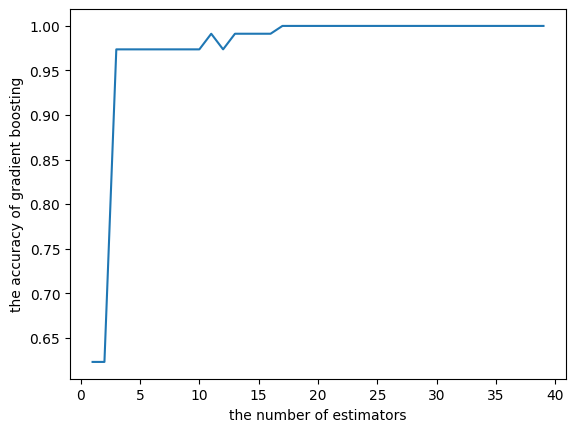

In [18]:
import sklearn.datasets as datasets
import sklearn.metrics as metrics
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import numpy as np

X, y = datasets.load_breast_cancer(return_X_y=True)
train_x, test_x, train_y, test_y = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

'''
gb2 = GradientBoostingClassifier(n_estimators=20, random_state=10)
gb2.fit(X, y)

xlim = axe.get_xlim()
ylim = axe.get_ylim()

xlin = np.linspace(xlim[0], xlim[1], 30)
ylin = np.linspace(ylim[0], ylim[1], 30)
Yc, Xc = np.meshgrid(ylin, xlin)
xy = np.vstack([Xc.ravel(), Yc.ravel()]).T
P = gb2.decision_function(xy).reshape(Xc.shape)
axe.contour(Xc, Yc, P, levels=[0], colors='r')

fig.savefig("output/img.png", dpi = 300)
plt.close(fig)
'''

total_n = 40
acc_list = []
for n in range(1, total_n):
    print('num of n:',n)
    gb2 = GradientBoostingClassifier(n_estimators=n, random_state=10)
    gb2.fit(X, y)
    y_pred = gb2.predict(test_x)
    acc = metrics.accuracy_score(test_y, y_pred)
    acc_list.append(acc)

fig, axe = plt.subplots()
axe.plot(range(1, total_n), acc_list)
axe.set_xlabel("the number of estimators")
axe.set_ylabel("the accuracy of gradient boosting")
fig.savefig("output/img.png", dpi = 300)
plt.close(fig)

FileNotFoundError: ignored

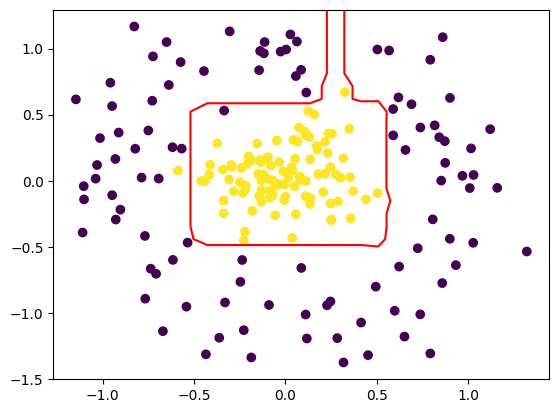

In [11]:
import sklearn.datasets as datasets
import sklearn.metrics as metrics
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import numpy as np

X, y = datasets.make_circles(200, noise=0.2, factor=0.1, random_state=12)

fig, axe = plt.subplots()
axe.scatter(X[:, 0], X[:, 1], c=y)

gb2 = GradientBoostingClassifier(n_estimators=20, random_state=10)
gb2.fit(X, y)

xlim = axe.get_xlim()
ylim = axe.get_ylim()

xlin = np.linspace(xlim[0], xlim[1], 30)
ylin = np.linspace(ylim[0], ylim[1], 30)
Yc, Xc = np.meshgrid(ylin, xlin)
xy = np.vstack([Xc.ravel(), Yc.ravel()]).T
P = gb2.decision_function(xy).reshape(Xc.shape)
axe.contour(Xc, Yc, P, levels=[0], colors='r')

fig.savefig("output/img.png", dpi = 300)
plt.close(fig)

In [4]:
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

X, y = datasets.load_breast_cancer(return_X_y=True)
train_x, test_x, train_y, test_y = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

gb = GradientBoostingClassifier(random_state=10)

param_grid = [{
    "n_estimators": [1, 2, 4, 16, 32],
    "learning_rate": [0.05, 0.1, 0.2, 0.4],
    "min_samples_leaf": [1, 2, 4, 8],
}]

cv = GridSearchCV(gb, param_grid=param_grid, scoring="f1", n_jobs=4)
cv.fit(train_x, train_y)

print("The best F1-score is {}.".format(cv.best_score_))
print("The parameter of best estimator is {}.".format(cv.best_params_))

The best F1-score is 0.9723199122018296.
The parameter of best estimator is {'learning_rate': 0.4, 'min_samples_leaf': 4, 'n_estimators': 32}.


the shape of X is (3000, 30)
the shape of y is (3000,)


FileNotFoundError: ignored

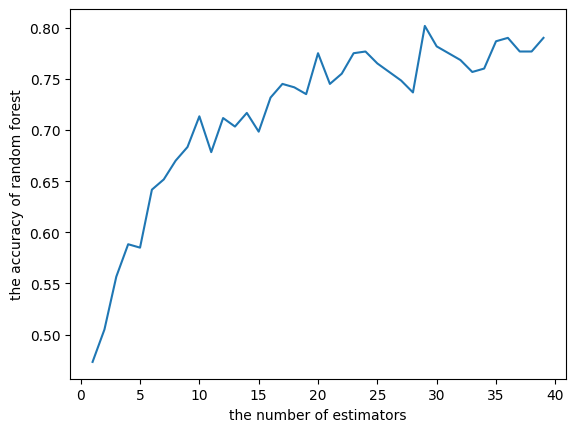

In [19]:
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

X, y = datasets.make_classification(n_samples=3000,
                                    n_features=30,
                                    n_classes=4,
                                    n_informative=20)
print("the shape of X is {}".format(X.shape))
print("the shape of y is {}".format(y.shape))

train_x, test_x, train_y, test_y = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

total_n = 40
acc_list = []
for n in range(1, total_n):
    rf = RandomForestClassifier(n_estimators=n)
    rf.fit(train_x, train_y)
    y_pred = rf.predict(test_x)
    acc = metrics.accuracy_score(test_y, y_pred)
    acc_list.append(acc)

fig, axe = plt.subplots()
axe.plot(range(1, total_n), acc_list)
axe.set_xlabel("the number of estimators")
axe.set_ylabel("the accuracy of random forest")
fig.savefig("output/img.png", dpi = 300)
plt.close(fig)